<a href="https://colab.research.google.com/github/SydanJainen/4EU-DeepLearningCourse/blob/main/Week_03/Week3Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from matplotlib import cm
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import random_split

Question 1: Define a training and validation dataset and plot both loss curves. Compute the validation loss at the end of each epoch. You can reuse the dataloaders from the PCA section! Can you comment on the validation vs training loss? You can check


In [13]:
batch_size = 32

train_dataset = datasets.MNIST('./data',
                               train=True,
                               download=True,
                               transform=transforms.Compose([
                       transforms.ToTensor(),
                   ]))

test_dataset = datasets.MNIST('./data',
                                    train=False,
                               transform=transforms.Compose([
                       transforms.ToTensor(),
                   ]))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                batch_size=batch_size,
                                                shuffle=False)

val_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                batch_size=batch_size,
                                                shuffle=False)

train_images = train_loader.dataset.data.detach().numpy().reshape(-1, 28*28)
print(f'Num training images: {len(train_images)},\tmin val: {train_images.min():.3f},\tmax val: {train_images.max():.3f}')

Num training images: 60000,	min val: 0.000,	max val: 255.000


In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [15]:
class Encoder(nn.Module):
    def __init__(self, latent_dims,input_dim):
        super(Encoder, self).__init__()
        self.linear1 = nn.Linear(input_dim**2, 512) # in questo caso 27 x 27 perchè sono immagini: w, h
        self.linear2 = nn.Linear(512, latent_dims)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        return self.linear2(x)

In [16]:
class Decoder(nn.Module):
    def __init__(self, latent_dims,input_dim):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, input_dim**2)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, input_dim, input_dim))

In [17]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dims,input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dims,input_dim)
        self.decoder = Decoder(latent_dims,input_dim)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [18]:
def train(autoencoder, data, val_data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    losses = []
    val_losses = []
    for epoch in range(epochs):
        print("epoch: ",epoch)
        loss_e = 0
        for x, y in data: # y not used. unsupervised task
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum() # L2 metric
            loss.backward()
            opt.step()
            loss_e += loss.to('cpu').detach().numpy()
        losses.append(loss_e/len(data))

        loss_val_e = 0
        for x, y in val_data: # y not used. unsupervised task
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum() # L2 metric
            loss.backward()
            opt.step()
            loss_val_e += loss.to('cpu').detach().numpy()
        val_losses.append(loss_val_e/len(val_data))
    return autoencoder, losses, val_losses

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9


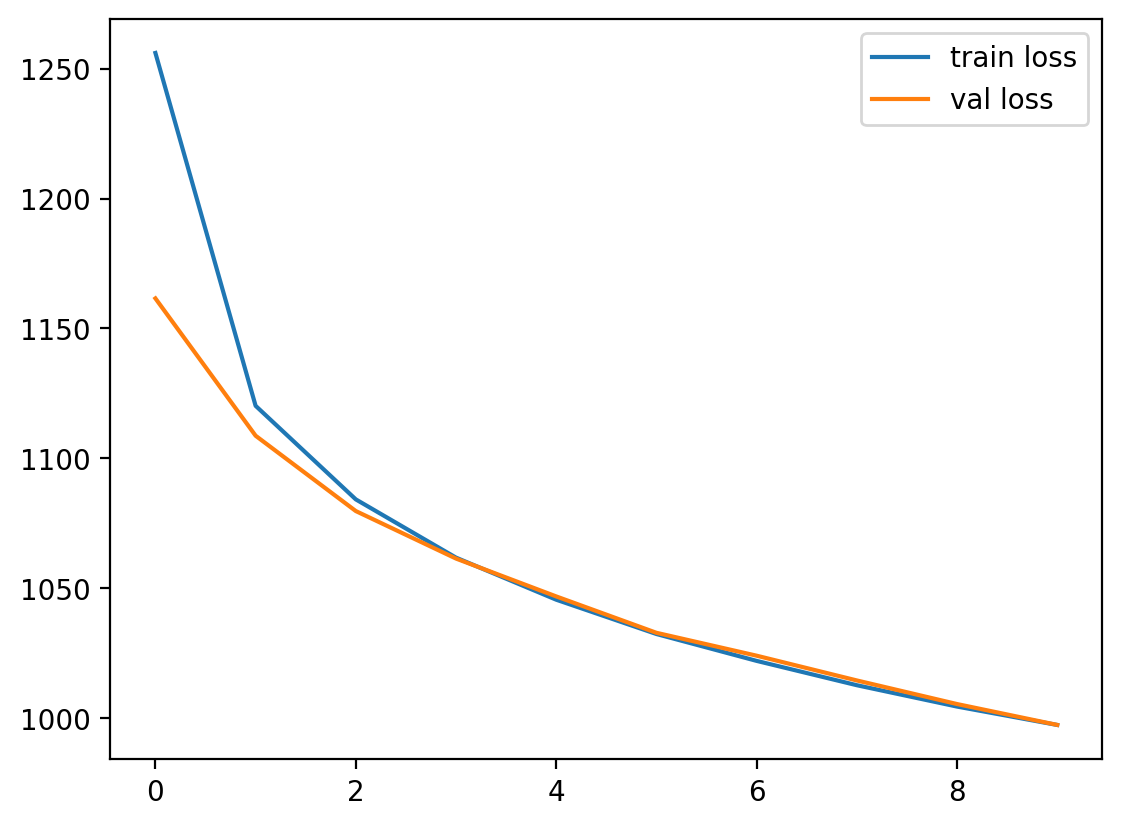

In [19]:
latent_dims = 2
input_dim = 28
autoencoder = Autoencoder(latent_dims,input_dim).to(device) # GPU


autoencoder, losses, val_losses = train(autoencoder, train_loader, val_loader, epochs=10)
plt.plot(losses,label='train loss')
plt.plot(val_losses,label='val loss')
plt.legend()
plt.show()

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9


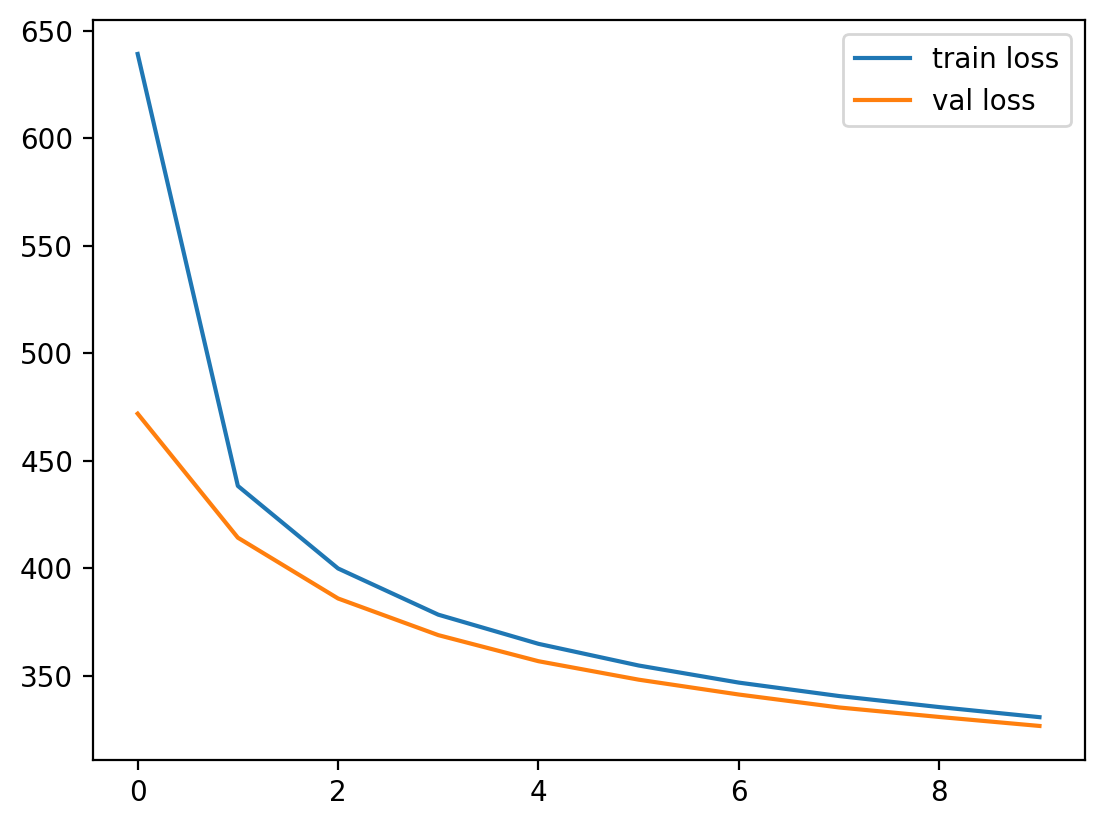

In [20]:
latent_dims = 10
input_dim = 28
autoencoder = Autoencoder(latent_dims,input_dim).to(device) # GPU


autoencoder, losses, val_losses = train(autoencoder, train_loader, val_loader, epochs=10)
plt.plot(losses,label='train loss')
plt.plot(val_losses,label='val loss')
plt.legend()
plt.show()

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9


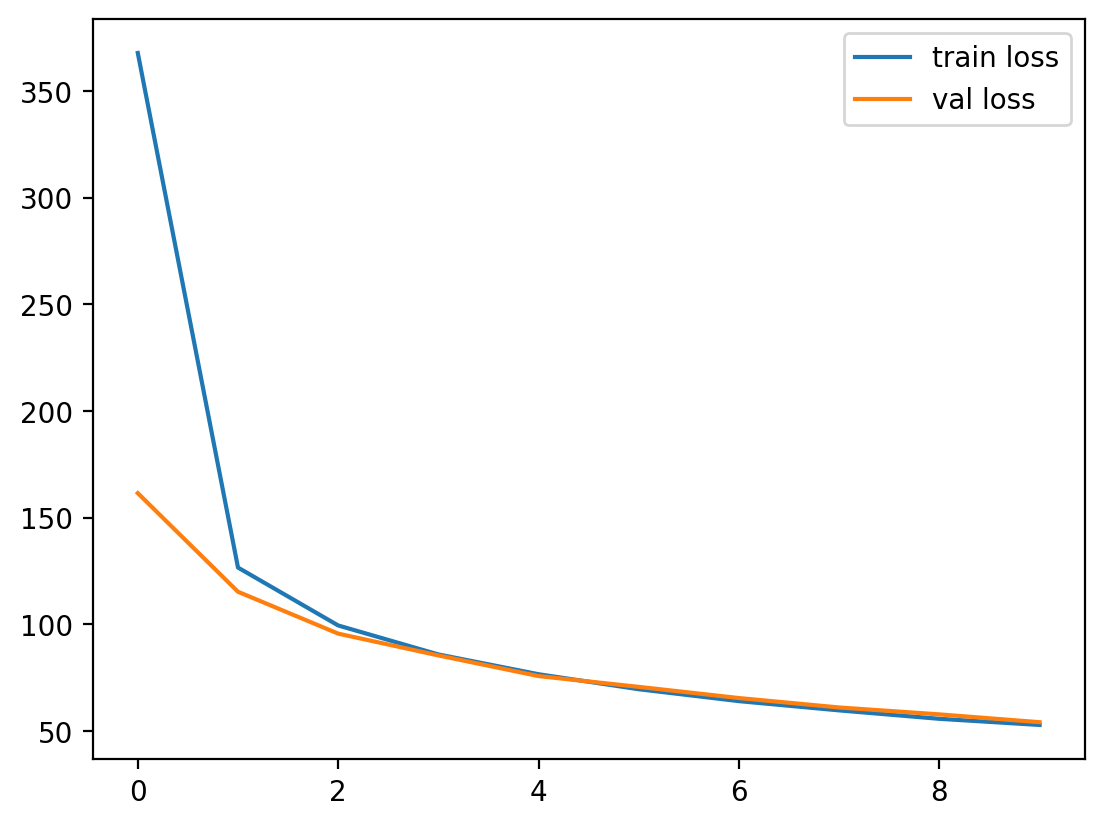

In [21]:
latent_dims = 800
input_dim = 28
autoencoder = Autoencoder(latent_dims,input_dim).to(device) # GPU


autoencoder, losses, val_losses = train(autoencoder, train_loader, val_loader, epochs=10)
plt.plot(losses,label='train loss')
plt.plot(val_losses,label='val loss')
plt.legend()
plt.show()